# APS LEADERSHIP ANALYSIS

## Importing Libraries

In [1]:
from urllib.request import urlopen
import json
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = 1000

## Getting Data from APS Data API

### Fetching 2015 Data : DO NOT RUN THIS CELL| WILL TAKE 20 MINS TO GET DATA

In [3]:
# APS 2015 API URL
url_2015 = 'https://data.gov.au/data/api/3/action/datastore_search?resource_id=0b7de79a-1355-47f1-add8-c2e0593dedbe'  
fileobj_2015 = urlopen(url_2015)

# Loading JSON Data in Python
data_2015 = json.loads(fileobj_2015.read().decode())

# Creating Python Dataframe
df_2015 = pd.DataFrame(data_2015['result']['records'])

# Extracting Data from API as it gives only 100 records per iteration
while data_2015['result']['_links']['next'] is not None or data_2015['result']['_links']['next'] != '' or data_2015['result']['_links']['next'] != ' ':
    url_2015 = 'https://data.gov.au/data' + data_2015['result']['_links']['next']
    fileobj_2015 = urlopen(url_2015)
    data_2015 = json.loads(fileobj_2015.read().decode())
    df_2015 = pd.concat([df_2015, pd.DataFrame(data_2015['result']['records'])])
    if data_2015['result']['offset'] == 45200:
        break
# Removing Unwanted Fields
df_2015.drop(['_id', 'ResponseID', 'Portfolio', 'AS1', 'At_Classification'], axis=1, inplace=True)

In [ ]:
# Saving Data to CSV so not to run API fetch every time
df_2015.to_csv('Sampled_Data.csv')

### Fetching 2014 Data  : DO NOT RUN THIS CELL| WILL TAKE 20 MINS TO GET DATA

In [ ]:
# APS 2014 API URL
url_2014 = 'https://data.gov.au/data/api/3/action/datastore_search?resource_id=9b44e035-3bed-40dc-9687-34fc47b9f228'  
fileobj_2014 = urlopen(url_2014)

# Loading JSON Data in Python
data_2014 = json.loads(fileobj_2014.read().decode())

# Creating Python Dataframe
df_2014 = pd.DataFrame(data_2014['result']['records'])

# Extracting Data from API as it gives only 100 records per iteration
while data_2014['result']['_links']['next'] is not None or data_2014['result']['_links']['next'] != '' or data_2014['result']['_links']['next'] != ' ':
    url_2014 = 'https://data.gov.au/data' + data_2014['result']['_links']['next']
    fileobj_2014 = urlopen(url_2014)
    data_2014 = json.loads(fileobj_2014.read().decode())
    df_2014 = pd.concat([df_2014, pd.DataFrame(data_2014['result']['records'])])
    if data_2014['result']['offset'] == 45200:
        break

In [ ]:
# Saving Data to CSV so not to run API fetch every time
df_2015.to_csv('Sampled_Data_2014.csv')

## Handling Missing Data & Selecting Variables

In [2]:
aps_2015 = pd.read_csv('Sampled_Data.csv', na_values=[' '], low_memory=False)
columns_to_select_15 = ["AC1", "AS2","q1", "q2", "q7@", "q8","q17a","q17b","q17c","q17d","q18a",
                     "q18b", "q18c", "q18d", "q18e", "q18f", "q19", "q20a", "q20b", "q20c",
                     "q20d", "q20e", "q20f", "q20g", "q20h", "q20i", "q21a", "q21b", "q21c",
                     "q21d", "q21e", "q21f", "q21g", "q21h", "q21i", "q21j","q22b","q22h","q22i",
                     "q22j","q22k","q24c", "q24h","q24m", "q24o", "q24p", "q30", "q31", "q32",
                     "q33", "q34a", "q34b", "q35a", "q35b", "q35c", "q35d", "q35e", "q35f", "q35g",
                     "q36a", "q36b", "q37a", "q37b", "q37c", "q37d", "q37e", "q37f", "q37g", "q37h",
                     "q37i", "q37j", "q37k", "q37l","q53b", "q53c", "q58a", "q58b", "q58c", "q58d",
                     "q58e", "q58f", "q58g", "q58h", "q58i", "q58j", "q59", "q60", "q64c", "q67c",
                     "q67d", "q67e", 'JobEngagement','TeamEngagement', 'SprvisrEngagement', 'AgencyEngagement']
aps_final_15 = aps_2015[columns_to_select_15]

## Extrating Missing Data
pd.DataFrame(aps_final_15.isna().sum()).to_csv('Missing_Data.csv')

## Filtering Missing data
aps_cleaned_2015 = aps_final_15[~aps_final_15.isnull().any(axis=1)]
aps_cleaned_2015.shape

# Saving Cleaned data 
aps_cleaned_2015.to_csv('APS_FINAL_DATA.csv')

# Performing for 2014 dataset
aps_2014 = pd.read_csv('Sampled_Data_2014.csv', na_values=[' '], low_memory=False)
columns_to_select_2014 = ["Agency_Cluster", "Agency_Size", "q1", "q2@@", "Actual_Classification@",
                          "q8","q18a","q18b","q18c","q18d","q18e", "q19a", "q19b", "q19c", "q19d",
                          "q19e", "q20a", "q20b", "q20c", "q20d", "q20e", "q20f", "q20g", "q21a",
                          "q21b", "q21c", "q21d", "q21e", "q21f", "q21g", "q21h", "q21i", "q21j",
                          "q22b","q22h","q22i", "q22j", "q22o","q24c", "q24h","q24m", "q24o", "q24p",
                          "q31", "q32@", "q33", "q34", "q35a@", "q35b@", "q36a", "q36b", "q36c", "q36d",
                          "q36e", "q36f", "q36g", "q37a", "q37b", "q50b", "q50c", "q55a", "q55b", "q55c",
                          "q55d", "q55e", "q55f", "q55g", "q55h", "q55i", "q55j", "q56", "q57", "q79b",
                          "q79c", "q79d", "JobEngagement", "TeamEngagement", "SprvisrEngagement", "AgencyEngagementV2"]
aps_final_14 = aps_2014[columns_to_select_2014]
aps_cleaned_2014 = aps_final_14[~aps_final_14.isnull().any(axis=1)]
aps_cleaned_2014.shape
aps_cleaned_2014.to_csv('APS_FINAL_DATA_2014.csv')

The endcoding of Responses from Strongly Agree, Agree etc. categories to numbers in correct order is performed in R.

## EFA Initialization

### Reading Encoded file  generated in R

In [3]:
# read encoded file
aps = pd.read_csv('APS_FINAL_DATA_2015_en.csv')
encode_df = pd.read_csv('APS_FINAL_DATA_2015_en.csv').iloc[:,2:]
encoded_df_14 = pd.read_csv('APS_FINAL_DATA_2014_en.csv').iloc[:,2:]

### Selecting Variables for EFA

In [4]:
# variable selection 
efa_aps = aps[["q20b","q20d","q20e","q20f","q20g","q24m", "q24o","q53b", "q53c", "q58a",
               "q58b", "q58c", "q58d", "q58e", "q58f",
               "q58g", "q58h", "q58i", "q58j","q64c",
               "q67c","q67d", "q67e"]]

### Descriptive Analysis

In [6]:
# Descriptive Analysis

desc = efa_aps.agg([np.mean,np.std]).T
desc['skew'] = efa_aps.apply(skew)
desc['kurtosis'] = efa_aps.apply(kurtosis)
desc.to_csv("Descriptive Analysis.csv")

### Outlier Detection

<AxesSubplot:>

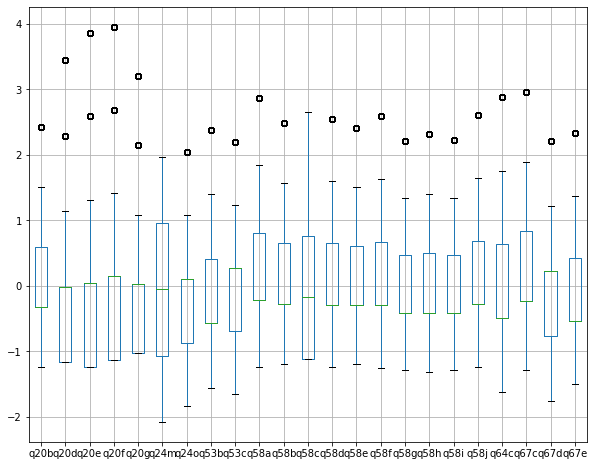

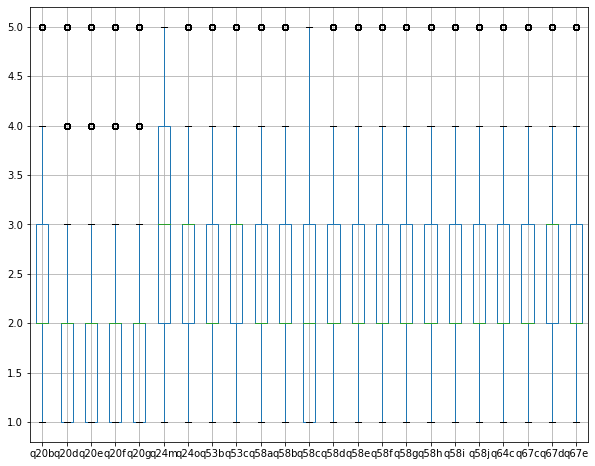

In [7]:
# Outlier Detection

efa_aps_z =efa_aps.apply(zscore)
plt.figure(figsize=(10,8))
efa_aps_z.boxplot()
plt.figure(figsize=(10,8))
efa_aps.boxplot()

### Anova

In [8]:
# ANOVA
stat_df = pd.DataFrame({'Variable':[], 'F':[], 'p-value': [], 'Mean EL/SES': [],'Mean Trainee/Grad/APS':[], 'Mean Diff':[]} )
for col in ["q20b","q20d","q20e","q20f","q20g","q24m", "q24o","q53b", "q53c", "q58a",
            "q58b", "q58c", "q58d", "q58e", "q58f", "q58g", "q58h", "q58i", "q58j","q64c",
            "q67c","q67d", "q67e"]:
    
    owa = stats.f_oneway(encode_df[col][encode_df['q7.'] == 'EL/SES'],
               encode_df[col][encode_df['q7.'] == 'Trainee/Grad/APS'])
    
    mean1 = encode_df[col][encode_df['q7.'] == 'EL/SES'].mean()
    mean2 = encode_df[col][encode_df['q7.'] == 'Trainee/Grad/APS'].mean()
    
    stat_df = pd.concat([stat_df,pd.DataFrame([{'Variable':col, 'F':owa.statistic,
                                                'p-value': owa.pvalue, 'Mean EL/SES' : mean1,
                                                'Mean Trainee/Grad/APS': mean2, 'Mean Diff': abs(mean1-mean2)}])])
stat_df.to_csv('Anova.csv')

## Well Being Index: Change 2014 vs 2015

In [10]:
encode_df['wbi'] = (encode_df.loc[:,["q22h","q22i","q24c","q32","q35a","q35b","q35f"]] * 2).sum(axis=1)/7
encoded_df_14['wbi'] = (encoded_df_14.loc[:,["q22h","q22i","q24c","q33","q36a","q36b","q36f"]] * 2).sum(axis=1)/7

### Based on Agency Cluster

In [11]:
encode_df.groupby("AC1")["wbi"].mean()

AC1
Larger operational     5.155097
Policy                 4.962401
Regulatory             4.873950
Smaller operational    4.936672
Specialist             4.736444
Name: wbi, dtype: float64

### Based on Agency Size

In [12]:
encode_df.groupby("AS2")["wbi"].mean()

AS2
Large (1001 or more)               5.097673
Medium (251 to 1000)               4.920685
Small (less than 251 employees)    4.699782
Name: wbi, dtype: float64

### Based on Agency Age Group

In [13]:
encode_df.groupby("q2")["wbi"].mean()

q2
30 to 34 years      5.085550
35 to 39 years      5.115913
40 to 44 years      5.146338
45 to 49 years      5.113650
50 to 54 years      5.071394
55 to 59 years      5.084463
60 years or more    4.941230
Under 30 years      4.889796
Name: wbi, dtype: float64

### Based on Experience

In [14]:
encode_df.groupby("q8")["wbi"].mean()

q8
1 to less than 5 years      4.895853
10 to less than 15 years    5.126954
15 to less than 20 years    5.147293
20 years or more            5.111794
5 to less than 10 years     5.098346
Less than 1 year            4.608603
Name: wbi, dtype: float64

### Based on Workgroup Size

In [15]:
encode_df.groupby("q19")["wbi"].mean()

q19
1 to 2 employees        5.052351
11 or more employees    5.127739
3 to 5 employees        4.979176
6 to 10 employees       5.036184
Name: wbi, dtype: float64

### Based on Supervisor Level

In [16]:
encode_df.groupby("q59")["wbi"].mean()

q59
APS 1-2 (or equivalent)                                 4.945578
APS 3-4 (or equivalent)                                 5.281278
APS 5-6 (or equivalent)                                 5.319789
Executive Level 1 (or equivalent)                       5.030185
Executive Level 2 (or equivalent)                       4.982437
Senior Executive Service Band 1 (or equivalent)         4.833046
Senior Executive Service Band 2 or 3 (or equivalent)    4.437800
Trainee/Apprentice                                      3.142857
Name: wbi, dtype: float64

### Overall Mean

In [21]:
encode_df['wbi'].mean()

5.068466349377351